Ajusta una línea de base a los espectros calibrados y aplica la corrección de velocidad bariocéntrica.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import csv
import scipy as sp
from scipy.ndimage import median_filter
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, Galactic
from astropy.coordinates import ICRS, LSR
# import plot_params
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# function to calculate (additive) barycentric velocity correction to the data
def vbary(l, b, tobs):
    Fisica_courtyard = EarthLocation(lat=-33.45*u.deg, lon=-70.6839*u.deg, height=510*u.m)
    here = Fisica_courtyard
    t = Time(tobs, scale='utc')
    c = SkyCoord(l, b, frame='galactic', unit='deg')
    print(c)
    barycorr = c.radial_velocity_correction(obstime=t, location=here, kind='barycentric')
    return barycorr.to(u.km/u.s).value
print(vbary(0., 40., '2022-05-08 22:10:28'))

<SkyCoord (Galactic): (l, b) in deg
    (0., 40.)>
2.664395468987767


In [ ]:
# go to the data directory
path = '/content/drive/MyDrive/Python/example_data'
os.chdir(path)
cwd = os.getcwd()

In [ ]:
# look at the raw data to get the longitude and observation time
obs = {"file":[], "longitude":[], "tobs":[]}
for f in os.listdir():
    if os.path.isdir(f) and f[0:3]=='lon' and len(f)==5:
        l = int(f[-2:])
        spectra = glob.glob(f+'/*.csv')
        tobs = spectra[0][6:25].strip().replace('_',' ').replace('.',':')
        obs["file"].append(f)
        obs["longitude"].append(l)
        obs["tobs"].append(tobs)
print(obs)

{'file': ['lon50', 'lon80', 'lon20', 'lon30', 'lon40', 'lon70', 'lon90', 'lon10', 'lon60'], 'longitude': [50, 80, 20, 30, 40, 70, 90, 10, 60], 'tobs': ['2022-01-08 16:19:36', '2022-01-08 17:15:08', '2022-01-08 15:22:24', '2022-01-08 15:38:03', '2022-01-08 15:51:44', '2022-01-08 16:59:56', '2022-01-08 17:26:23', '2022-01-08 15:04:47', '2022-01-08 16:36:48']}


In [ ]:
import os

# go to the data directory
path = '/content/drive/MyDrive/Python/example_data'
os.chdir(path)
cwd = os.getcwd()


In [ ]:
for i in range(len(obs['file'])):
    f = 'calibrated_spectra/' + obs['file'][i] + '_cal.csv'
    print("Attempting to load file:", f)
    v, T = np.genfromtxt(f, delimiter=',', unpack=True)


Attempting to load file: calibrated_spectra/lon50_cal.csv


FileNotFoundError: ignored

In [ ]:
print("Current working directory:", os.getcwd())
for i in range(len(obs['file'])):
    f = 'calibrated_spectra/' + obs['file'][i] + '_cal.csv'
    print("Attempting to load file:", f)
    v, T = np.genfromtxt(f, delimiter=',', unpack=True)


Current working directory: /content/drive/.shortcut-targets-by-id/1Bt5vB7n3MStX1hI7bki2XyLu_oouLrQU/example_data
Attempting to load file: calibrated_spectra/lon50_cal.csv


FileNotFoundError: ignored

In [ ]:
import os

drive_path = '/content/drive/MyDrive/Python/example_data/'

for i in range(len(obs['file'])):
    f = os.path.join(drive_path, 'calibrated_spectra', f"{obs['file'][i]}_cal.csv")
    print("Attempting to load file:", f)
    v, T = np.genfromtxt(f, delimiter=',', unpack=True)

Attempting to load file: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon50_cal.csv


FileNotFoundError: ignored

In [ ]:
import os

drive_path = '/content/drive/MyDrive/Python/example_data/'

for i in range(len(obs['file'])):
    f = os.path.join(drive_path, 'calibrated_spectra', f"{obs['file'][i]}_cal.csv")
    print("Attempting to load file:", f)

    if os.path.isfile(f):
        v, T = np.genfromtxt(f, delimiter=',', unpack=True)
    else:
        print("File not found:", f)

Attempting to load file: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon50_cal.csv
File not found: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon50_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon80_cal.csv
File not found: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon80_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon20_cal.csv
File not found: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon20_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon30_cal.csv
File not found: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon30_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon40_cal.csv
File not found: /content/drive/MyDrive/Python/example_data/calibrated_spectra/lon40_cal.csv
Attempting to load file: /content/d

In [ ]:
import os

drive_path = '/content/drive/MyDrive/Python/calibrated_spectra/'

# List files in the directory
files_in_directory = os.listdir(drive_path)
print(files_in_directory)


['lon50_cal.csv', 'lon80_cal.csv', 'lon20_cal.csv', 'lon30_cal.csv', 'lon40_cal.csv', 'lon70_cal.csv', 'lon90_cal.csv', 'lon10_cal.csv', 'lon60_cal.csv']


In [ ]:
import os

drive_path = '/content/drive/MyDrive/Python/calibrated_spectra/'

for file_name in ['lon50_cal.csv', 'lon80_cal.csv', 'lon20_cal.csv', 'lon30_cal.csv', 'lon40_cal.csv', 'lon70_cal.csv', 'lon90_cal.csv', 'lon10_cal.csv', 'lon60_cal.csv']:
    file_path = os.path.join(drive_path, file_name)
    print("Attempting to load file:", file_path)

    if os.path.isfile(file_path):
        v, T = np.genfromtxt(file_path, delimiter=',', unpack=True)
    else:
        print("File not found:", file_path)


Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon50_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon80_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon20_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon30_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon40_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon70_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon90_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon10_cal.csv
Attempting to load file: /content/drive/MyDrive/Python/calibrated_spectra/lon60_cal.csv


In [ ]:
for i in range(len(obs['file'])):
    f = '/content/drive/MyDrive/Python/calibrated_spectra/'+obs['file'][i]+'_cal.csv'
    if os.path.isfile(f):
        v, T = np.genfromtxt(f, delimiter=',', unpack=True)
    else:
        print("File not found:", f)

<SkyCoord (Galactic): (l, b) in deg
    (50., 0.)>
/content/drive/MyDrive/Python/calibrated_spectra//lon50_cal.csv Barycentric correction =  -3.04 km/s, LSR correction =  14.98 km/s
Writing reduced spectrum to  lon50_reduced.csv
<SkyCoord (Galactic): (l, b) in deg
    (80., 0.)>
/content/drive/MyDrive/Python/calibrated_spectra//lon80_cal.csv Barycentric correction = -11.02 km/s, LSR correction =  13.38 km/s
Writing reduced spectrum to  lon80_reduced.csv
<SkyCoord (Galactic): (l, b) in deg
    (20., 0.)>
/content/drive/MyDrive/Python/calibrated_spectra//lon20_cal.csv Barycentric correction =   5.77 km/s, LSR correction =  12.56 km/s
Writing reduced spectrum to  lon20_reduced.csv
<SkyCoord (Galactic): (l, b) in deg
    (30., 0.)>
/content/drive/MyDrive/Python/calibrated_spectra//lon30_cal.csv Barycentric correction =   2.90 km/s, LSR correction =  13.79 km/s
Writing reduced spectrum to  lon30_reduced.csv
<SkyCoord (Galactic): (l, b) in deg
    (40., 0.)>
/content/drive/MyDrive/Python/cal

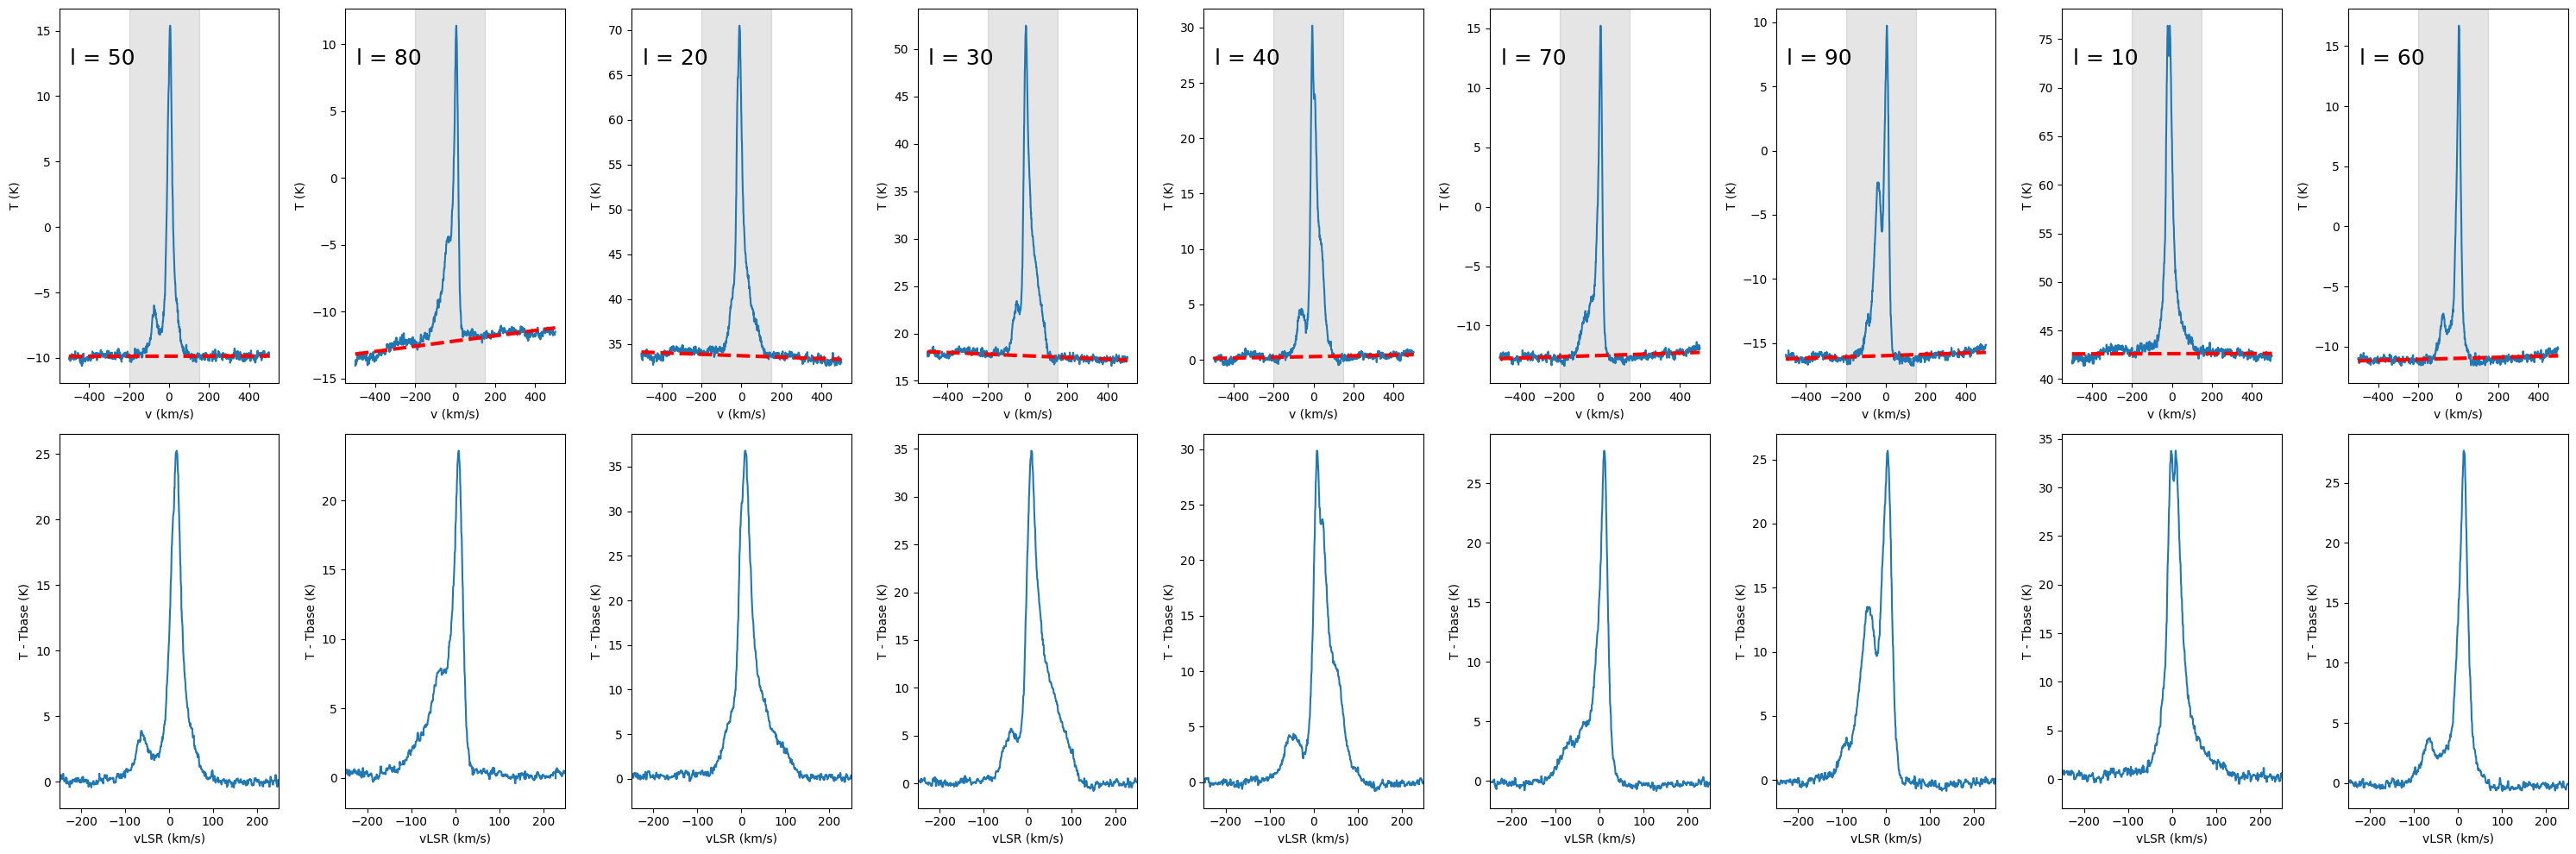

In [ ]:
# flag to decide whether to write the reduced files out or not
write = True

if write:
    reduced_subdir = 'reduced_spectra'
    reduced_dir = '/content/drive/MyDrive/Python/' + reduced_subdir
    # check to see if a "reduced" subdirectory exists, else make one
    if not os.path.isdir(reduced_dir):
        print('Creating subdirectory', reduced_subdir, ' in ', '/content/drive/MyDrive/Python')
        os.mkdir(reduced_dir)

vbpass_lo = -500
vbpass_hi = 500

vbase_lo = -200
vbase_hi = 150

fig = plt.figure(figsize=(30, 10))

for i in range(len(obs['file'])):
    f = '/content/drive/MyDrive/Python/calibrated_spectra//'+obs['file'][i]+'_cal.csv'
    v, T = np.genfromtxt(f, delimiter=',', unpack=True)
    bpass = (v > vbpass_lo) & (v < vbpass_hi)
    v = v[bpass]
    T = T[bpass]

    ibase = (v < vbase_lo) + (v > vbase_hi)
    order = 1
    p = np.polyfit(v[ibase], T[ibase], order)
    Tbase = np.polyval(p, v)

    ax1 = fig.add_subplot(2, len(obs['file']), i+1)
    ax1.plot(v, T)
    ax1.plot(v, Tbase, 'r--', lw=3)
    ax1.set_xlabel('v (km/s)')
    ax1.set_ylabel('T (K)')
    ax1.text(0.05, 0.85, str('l = {0}'.format(obs['longitude'][i])), fontsize=18, ha='left', transform=ax1.transAxes)
    ax1.axvspan(vbase_lo, vbase_hi, color='black', alpha=0.1)

    # barycentric correction
    b = 0
    l = obs['longitude'][i]
    vcorr1 = vbary(l, b, obs['tobs'][i])

    lrad = l * np.pi/180
    brad = b * np.pi/180
    vcorr2 = 9*np.cos(lrad)*np.cos(brad) + 12*np.sin(lrad)*np.cos(brad) + 7*np.sin(brad)
    vLSR = v + vcorr1 + vcorr2
    print('{0} Barycentric correction = {1:6.2f} km/s, LSR correction = {2:6.2f} km/s'.format(f, vcorr1, vcorr2))

    ax2 = fig.add_subplot(2, len(obs['file']), len(obs['file'])+i+1)
    ax2.plot(vLSR, T-Tbase)
    ax2.set_xlabel('vLSR (km/s)')
    ax2.set_ylabel('T - Tbase (K)')
    ax2.set_xlim(-250, 250)

    if write:
        fr = obs['file'][i]+'_reduced.csv'
        print('Writing reduced spectrum to ', fr)
        with open(reduced_dir + '/' + fr, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(zip(vLSR, T-Tbase))

plt.tight_layout()
plt.show()

In [ ]:
print("Attempting to load file:", f)
if os.path.exists(f):
    print("File exists.")
else:
    print("File does not exist.")
